<a href="https://colab.research.google.com/github/yair1641/-DS_Intro_HW_5/blob/main/catsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a convnet from scratch on a small dataset
## The relevance of deep learning for small-data problems
### Downloading the data

*   First go to your Kaggle account, Scroll to API section and Click Expire API Token to remove previous tokens
*   Click on Create New API Token - It will download kaggle.json file on your machine.

Now continue with this notebook:

In [1]:
#! pip install -q kaggle
from google.colab import files

files.upload()  # Choose the kaggle.json file that you downloaded

TypeError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd


Make directory named kaggle and copy kaggle.json file ther

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Change the permissions of the file:

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

print kaggle dataset list:

In [ ]:
 ! kaggle datasets list

Download the dogs-vs-cats dataset:

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
!unzip -qq train.zip

### Copying images to training, validation, and test directories

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

# Building the Model:

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

## Configuring the network for training

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## Playing with Dataset objects

In [ ]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
random_numbers.shape

(1000, 16)

In [ ]:
random_numbers


array([[-1.04435674,  1.2819382 , -0.72015773, ..., -0.35025623,
        -1.00733399, -0.18472435],
       [-0.21046738, -0.35109907,  0.18049932, ...,  0.72594112,
         0.90010356,  0.14344203],
       [ 0.82499373,  0.71288718,  2.21584725, ...,  0.20466688,
        -0.10584417, -0.1821847 ],
       ...,
       [-0.37078091, -0.39291911, -1.09636408, ..., -0.54969197,
         0.26135258, -0.51450557],
       [-0.49186504,  1.80471071,  0.50255333, ...,  0.9644459 ,
        -0.12087968, -0.1968727 ],
       [ 0.06085759,  2.15145403,  0.32874857, ...,  0.21461449,
        -0.98237675, -0.95278621]])

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
      break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 85s 1s/step - loss: 0.7179 - accuracy: 0.5305 - val_loss: 0.6907 - val_accuracy: 0.5010
Epoch 2/30
63/63 [==============================] - 84s 1s/step - loss: 0.7101 - accuracy: 0.5225 - val_loss: 0.6788 - val_accuracy: 0.6300
Epoch 3/30
63/63 [==============================] - 83s 1s/step - loss: 0.6989 - accuracy: 0.5585 - val_loss: 0.6686 - val_accuracy: 0.5830
Epoch 4/30
63/63 [==============================] - 83s 1s/step - loss: 0.6459 - accuracy: 0.6305 - val_loss: 0.6291 - val_accuracy: 0.6300
Epoch 5/30
63/63 [==============================] - 84s 1s/step - loss: 0.6110 - accuracy: 0.6695 - val_loss: 0.6350 - val_accuracy: 0.6410
Epoch 6/30
63/63 [==============================] - 84s 1s/step - loss: 0.5858 - accuracy: 0.6930 - val_loss: 0.7807 - val_accuracy: 0.6420
Epoch 7/30
63/63 [==============================] - 84s 1s/step - loss: 0.5529 - accuracy: 0.7310 - val_loss: 0.6678 - val_accuracy: 0.6650
Epoch 8/30
63/63 [==

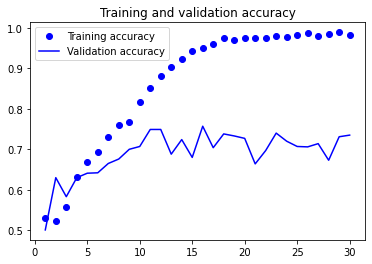

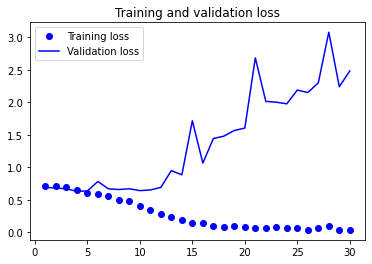

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 15s 236ms/step - loss: 0.6188 - accuracy: 0.6495
Test accuracy: 0.650


# Using data augmentation

### Define a data augmentation stage to add to an image model

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

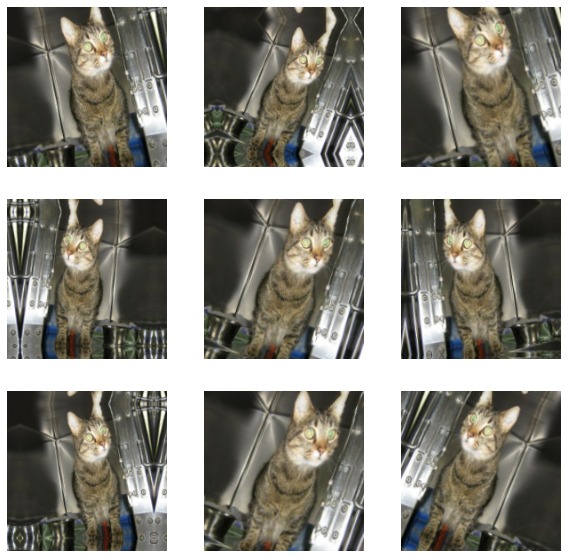

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized networks**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

**evaluating the the new model**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")


# Leveraging a pretrained model

**Feature extraction with a pretrained model**

Instantiating the VGG16 convolutional base

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 8s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Fast feature extraction without data augmentation**

Extracting the VGG16 features and corresponding labels

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 26ms/step - loss: 14.9841 - accuracy: 0.9260 - val_loss: 5.0667 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 2s 25ms/step - loss: 4.2316 - accuracy: 0.9730 - val_loss: 4.5198 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 2.2721 - accuracy: 0.9840 - val_loss: 3.8693 - val_accuracy: 0.9800
Epoch 4/20
63/63 [==============================] - 1s 24ms/step - loss: 2.2190 - accuracy: 0.9785 - val_loss: 11.1228 - val_accuracy: 0.9500
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 0.7090 - accuracy: 0.9930 - val_loss: 3.7535 - val_accuracy: 0.9780
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 0.5508 - accuracy: 0.9960 - val_loss: 4.0109 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 2s 24ms/step - loss: 0.6625 - accuracy: 0.9945 - val_loss: 4.2918 - val_accuracy: 0.9750
Epoch 8/20


**Plotting the results**

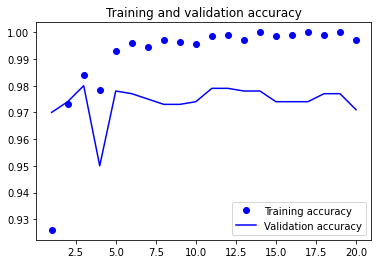

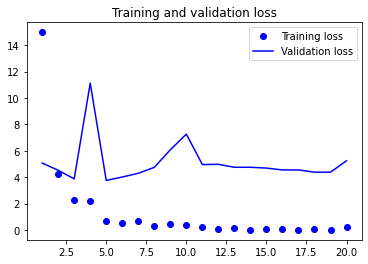

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Feature extraction together with data augmentation**

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False


**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 360s 6s/step - loss: 21.8276 - accuracy: 0.8915 - val_loss: 18.3050 - val_accuracy: 0.9170
Epoch 2/50
63/63 [==============================] - 380s 6s/step - loss: 7.8095 - accuracy: 0.9370 - val_loss: 3.6313 - val_accuracy: 0.9700
Epoch 3/50
63/63 [==============================] - 393s 6s/step - loss: 6.2019 - accuracy: 0.9505 - val_loss: 4.7342 - val_accuracy: 0.9740
Epoch 4/50
63/63 [==============================] - 387s 6s/step - loss: 5.1353 - accuracy: 0.9605 - val_loss: 4.0689 - val_accuracy: 0.9770
Epoch 5/50
63/63 [==============================] - 395s 6s/step - loss: 4.4916 - accuracy: 0.9655 - val_loss: 3.6954 - val_accuracy: 0.9780
Epoch 6/50
63/63 [==============================] - 374s 6s/step - loss: 4.5361 - accuracy: 0.9630 - val_loss: 3.7621 - val_accuracy: 0.9750
Epoch 7/50
63/63 [==============================] - 361s 6s/step - loss: 2.2789 - accuracy: 0.9775 - val_loss: 2.8879 - val_accuracy: 0.9810
Epoch 8/50


**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 249s 4s/step - loss: 2.2515 - accuracy: 0.9755
Test accuracy: 0.975


## Fine-tuning a pretrained model

In [ ]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 367s 6s/step - loss: 0.2617 - accuracy: 0.9915 - val_loss: 1.4101 - val_accuracy: 0.9820
Epoch 2/30
63/63 [==============================] - 365s 6s/step - loss: 0.2500 - accuracy: 0.9920 - val_loss: 1.4089 - val_accuracy: 0.9810
Epoch 3/30
63/63 [==============================] - 365s 6s/step - loss: 0.3901 - accuracy: 0.9885 - val_loss: 1.4076 - val_accuracy: 0.9810
Epoch 4/30
63/63 [==============================] - 365s 6s/step - loss: 0.3604 - accuracy: 0.9915 - val_loss: 1.4065 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 413s 7s/step - loss: 0.3954 - accuracy: 0.9925 - val_loss: 1.4104 - val_accuracy: 0.9820
Epoch 6/30
63/63 [==============================] - 426s 7s/step - loss: 0.7064 - accuracy: 0.9875 - val_loss: 1.4291 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 445s 7s/step - loss: 0.3048 - accuracy: 0.9940 - val_loss: 1.4206 - val_accuracy: 0.9800
Epoch 8/30
63

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 241s 4s/step - loss: 2.0876 - accuracy: 0.9775
Test accuracy: 0.978
